In [1]:
# Step 1: Install Kaggle API if not already installed
!pip install -q kaggle

# Step 2: Move your kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

# Step 3: Set permissions (important!)
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 95% 1.01G/1.06G [00:08<00:01, 48.2MB/s]
100% 1.06G/1.06G [00:08<00:00, 140MB/s] 


In [2]:
# Unzip if needed
!unzip dogs-vs-cats.zip -d ./dogs-vs-cats

Streaming output truncated to the last 5000 lines.
  inflating: ./dogs-vs-cats/train/dogs/dog.4419.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.442.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4420.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4421.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4422.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4424.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4425.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4426.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4427.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4431.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4433.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4436.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4438.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4439.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.444.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4440.jpg  
  inflating: ./dogs-vs-cats/train/dogs/dog.4441.jpg  
  inflating: ./dogs-vs-cats/train

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [4]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.5795 - loss: 1.7277 - val_accuracy: 0.6826 - val_loss: 0.6110
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7080 - loss: 0.5671 - val_accuracy: 0.7456 - val_loss: 0.5173
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7761 - loss: 0.4748 - val_accuracy: 0.5892 - val_loss: 0.8873
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8068 - loss: 0.4213 - val_accuracy: 0.7702 - val_loss: 0.4747
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8435 - loss: 0.3519 - val_accuracy: 0.7808 - val_loss: 0.5543
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8839 - loss: 0.2800 - val_accuracy: 0.8248 - val_loss: 0.4699
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.9206 - loss: 0.1995 - val_accuracy: 0.8000 - val_loss: 0.7482
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9476 - loss: 0.1318 - 

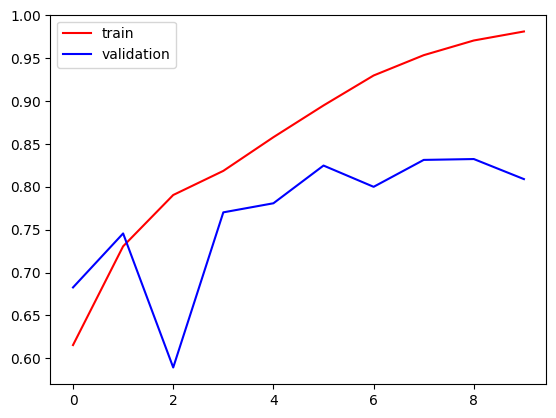

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

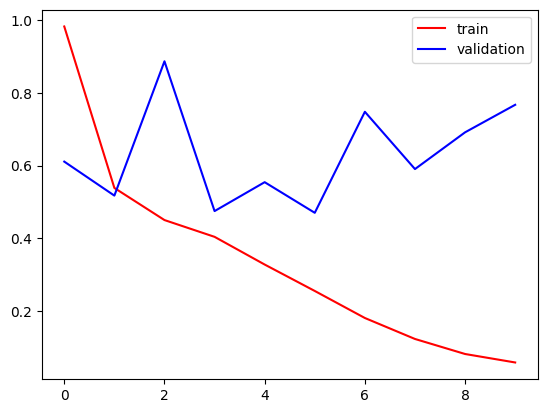

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
#testing data from outside of dataset

import cv2

In [59]:
test_img = cv2.imread('/content/dog.jpeg')

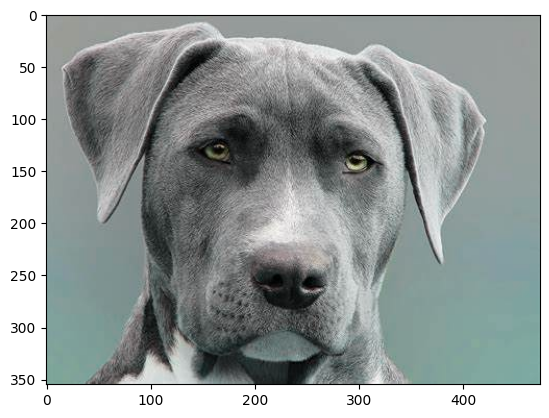

In [60]:
plt.imshow(test_img)

In [61]:
test_img.shape

(355, 474, 3)

In [62]:
test_img = cv2.resize(test_img,(256,256))

In [63]:
test_input = test_img.reshape((1,256,256,3))

In [73]:
model.predict(test_input)

# Get the prediction (probability)
prediction = model.predict(test_input)

# Convert probability to binary class (0 or 1)
predicted_class = (prediction > 0.5).astype("int32")[0][0]

# Map class to label
label_map = {1: 'Cat', 0: 'Dog'}
predicted_label = label_map[predicted_class]

# Print result
print("Predicted class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: Dog


In [74]:
test_img = cv2.imread('/content/cat.jpeg')

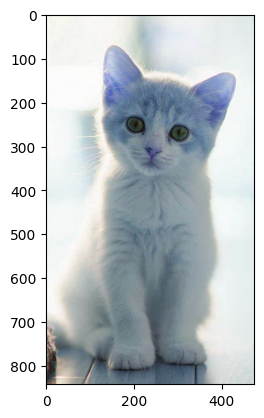

In [75]:
plt.imshow(test_img)

In [76]:
test_img.shape

(842, 474, 3)

In [77]:
test_img = cv2.resize(test_img,(256,256))

In [78]:
test_input = test_img.reshape((1,256,256,3))

In [79]:
model.predict(test_input)

# Get the prediction (probability)
prediction = model.predict(test_input)

# Convert probability to binary class (0 or 1)
predicted_class = (prediction > 0.5).astype("int32")[0][0]

# Map class to label
label_map = {1: 'Cat', 0: 'Dog'}
predicted_label = label_map[predicted_class]

# Print result
print("Predicted class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: Cat
